## __Summary of CM4 high-res configuration development__

#### __Odiv-183__: p125, c192. Remap scheme PPM_H4 initialized from year 0. Sea ice initial conditions based on year 100 of v3 rather than year 150.
#### __Odiv-184__: p125, c192. Remap scheme PPM_H4 initialized from year 0.
#### __Odiv-170__: p25, c192. Remap scheme PPM_H4 initialized from year 0.
#### __Odiv-191__: p125, c192. Initialized like Odiv-183/184, remap scheme = P1M_H2, submeso MLE decay time = 10 days. Used as baseline experiment to then tune submeso.
#### __Odiv-200__: p125, c192. Sensitivity of submeso parameterization, submeso MLE decay time = 20 days, with everything else the same as Odiv-191
#### __Odiv-206__: p125, c192. Sensitivity experiment with CM4.0 sea ice albedos initialized from year 180 of Odiv-200 run. 
#### __Odiv-207__: p125, c192. Sensitivity experiment with same sea ice albedos as Odiv-206 but with ESM4 snow-on-land albedos values.
#### __Odiv-209__: p125, c192. Same as Odiv-207 but initialized from year 0.

###### _Most recent p25 iterations:_
#### __Odiv-210__: p25, c192. Complete 350 years of p25 piControl with an older code and Arctic bug.
#### __Odiv-230__: p25, c192. Rerun of piControl with newer model code and Arctic bug fix, starting from year 100 of Odiv-210
#### __Odiv-231__: p25, c192. Historical run starting from year 100 of Odiv-210
#### __Odiv-232__: p25, c192. SSP5-85 scenario starting from year 2014 of Odiv-231

###### _Most recent p125 iterations:_
#### __Odiv-209__: Same as above .... 350 years piControl
#### __Odiv-233__: p125, c192. Historical run starting from year 100 of Odiv-209.

### __Odiv-313__: p125 ....



##### Note: A longer MLE decay time means the submeso MLE scheme hangs around longer to __more strongly effect restratification__. We adjusted to T=20 days (doubled the decay time) from Odiv-191 to Odiv-200 because we wanted stronger ML restratification to cool the model since we are running an 1850 piControl. In CM4-CMIP6, MLE T=30 days. Another "tunable" submesoscale parameter is MLE front-length scale ... a __smaller__ front length enhances the strength of the ML restratificaion. ESM4 used 200m, CM4 used 500m. All Odiv members use length = 500 m, this has not been adjusted.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xgcm
from xgcm import Grid
import momlevel as ml
import pandas as pd

### Load all necessary datasets:

In [2]:
def load_ocean_Drake_Passage(model_config):
    
    ## p125 configurations
    
    ##### CONTROL RUN 
    if model_config == 'Odiv-209':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    ##### CONTROL RUN NEW
    if model_config == 'Odiv-313':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
    
    
    ##### HISTORICAL RUN (branches from year 100 of Odiv-209 piControl).
    ##### ODiv-233 only goes to 1939
    if model_config == 'Odiv-233':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    if model_config == 'Odiv-255':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_historical_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_historical_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])    
        
    ##### SSP5-85
    if model_config == 'Odiv-293':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_ssp585_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_ssp585_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
        
   ## p25 configuration, Odiv-230+Odiv-306 is the combined piControl
    # ----------------------
    ## piControl Year 1 ---> 360 (use as years 1-->100 and then Odiv-230 below for 101 --> 360).
         
    if model_config == 'Odiv-210':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p25_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p25_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_umo])
    
    #####  ## piControl with Arctic bug fix Year 101 --> 360
    if model_config == 'Odiv-230':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
    
    
    if model_config == 'Odiv-306':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    ##### HISTORICAL RUN
    if model_config == 'Odiv-231':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
    
    ##### SSP5-85
    if model_config == 'Odiv-231-ssp585':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    return ds_drake

### Load om4p125 configuration datasets

In [18]:
odiv_209 = load_ocean_Drake_Passage('Odiv-209').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0001-01-16','0100-12-16'))

odiv_313 = load_ocean_Drake_Passage('Odiv-313').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0101-01-16','0360-12-16'))

odiv_233 = load_ocean_Drake_Passage('Odiv-233').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

odiv_255 = load_ocean_Drake_Passage('Odiv-255').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

odiv_293 = load_ocean_Drake_Passage('Odiv-293').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))


In [16]:
odiv_313

<xarray.Dataset>
Dimensions:     (nv: 2, time: 3120, z_l: 35, yh: 291, xq: 1, z_i: 36)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0101-01-16 12:00:00 ... 0360-12-16 12:00:00
  * xq          (xq) float64 -65.07
  * yh          (yh) float64 -70.69 -70.64 -70.59 ... -54.13 -54.05 -53.98
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    time_bnds   (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    uo          (time, z_l, yh, xq) float32 dask.array<chunksize=(60, 35, 291, 1), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    umo         (time, z_l, yh, xq) float32 dask.array<chunksize=(60, 35, 291, 1), meta=np.ndarray>
Attributes:
    title:             CM4_piControl_c192_OM4p125_v8
    associated_files:  areacello: 01010101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    filename:          ocean_Drake_Passage.010101-010512.uo.nc

### Load om4p25 configuration datasets

In [17]:
odiv_210 = load_ocean_Drake_Passage('Odiv-210').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0001-01-16','0100-12-16'))

odiv_230 = load_ocean_Drake_Passage('Odiv-230').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0101-01-16','0360-12-16'))

odiv_306 = load_ocean_Drake_Passage('Odiv-306').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

odiv_231 = load_ocean_Drake_Passage('Odiv-231').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

odiv_231_SSP585 = load_ocean_Drake_Passage('Odiv-231-ssp585').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

### Load static fields 

In [7]:
static_om4p125 = xr.open_dataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/CM4_piControl_c192_OM4p125_v5_proto1/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ocean_annual_z.static.nc')
static_om4p25 = xr.open_dataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/CM4_piControl_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ocean_annual_z.static.nc')

### Compute all total transports from zonal mass transport (umo).

In [19]:
def total_trans_annual(array):
    total_sv_ann = ml.util.annual_average((array.umo.sum(dim=['yh','z_l'])/10**6/1035),tcoord='time')
    return total_sv_ann

In [23]:
ACC_p125_cntrl_0_100 = total_trans_annual(odiv_209).squeeze().load()
ACC_p125_cntrl_101_360 = total_trans_annual(odiv_313).squeeze().load()
ACC_p125_hist = total_trans_annual(odiv_233).squeeze().load()
ACC_p125_hist_2 = total_trans_annual(odiv_255).squeeze().load()
ACC_p125_SSP585 = total_trans_annual(odiv_293).squeeze().load()

ACC_p25_cntrl_0_100 = total_trans_annual(odiv_210).squeeze().load()
ACC_p25_cntrl_101_360 = total_trans_annual(odiv_230).squeeze().load()
#ACC_p25_cntrl_361_105 = total_trans_annual(odiv_306).squeeze().load()
ACC_p25_hist = total_trans_annual(odiv_231).squeeze().load()
ACC_p25_SSP585 = total_trans_annual(odiv_231_SSP585).squeeze().load()

In [24]:
ACC_p125_cntrl_101_360

<xarray.DataArray 'umo' (time: 260)>
array([141.21899036, 140.87227894, 141.09023842, 141.11654889,
       139.86681801, 139.97803408, 144.38413863, 141.4293316 ,
       139.6270216 , 141.33221467, 141.76714585, 143.76717273,
       142.01875237, 141.74231085, 139.09915653, 138.32078918,
       135.12610096, 138.22127514, 134.92995723, 142.18709517,
       142.85917875, 138.98150406, 140.32827498, 137.75623295,
       139.71996064, 140.25367021, 138.66650363, 139.03928837,
       140.4967826 , 141.01571173, 139.88148016, 141.03244366,
       141.73116693, 142.24325116, 137.76159384, 139.7685762 ,
       140.00948256, 137.07528027, 136.14018785, 138.59052251,
       138.43804091, 142.45974661, 139.59538924, 138.53775354,
       137.3472651 , 141.40439175, 140.55578094, 137.56809085,
       142.30474276, 137.11396703, 138.46139215, 139.99455138,
       140.52064261, 140.45488336, 139.547357  , 141.21900923,
       140.42630581, 139.89408744, 139.60406978, 141.00911669,
       137.31825678, 136.63913433, 137.21428863, 139.93230216,
       143.4689844 , 140.92079386, 144.30274171, 145.44303576,
       143.21145234, 142.34877614, 148.99754073, 143.99733944,
       144.80466305, 139.60578579, 141.16511982, 141.11049892,
       140.70537964, 138.03706405, 139.25525658, 139.59231014,
...
       137.23891062, 141.88793421, 143.40687136, 140.44476317,
       142.89590515, 141.12483827, 138.9293926 , 138.38838409,
       140.13299593, 139.87105969, 137.5778082 , 138.18713115,
       141.22419145, 137.50730318, 140.452007  , 140.11596683,
       140.66253137, 145.16402111, 143.17643688, 142.54961533,
       140.52286075, 142.43309401, 143.63705221, 144.72530376,
       142.93657555, 143.04034336, 143.61934925, 142.19266983,
       143.92205831, 145.55713181, 135.26036929, 139.04560983,
       140.92598947, 138.74088741, 134.51811376, 136.22114617,
       138.63773821, 141.28249943, 140.24830115, 142.64965193,
       142.21615588, 142.30581508, 140.01574016, 141.19711913,
       144.44414573, 142.02379846, 143.23450791, 142.11517198,
       144.65954416, 142.79322545, 143.33892294, 139.52559171,
       145.00285355, 141.97298705, 142.11365068, 141.84955979,
       145.51796291, 141.07461162, 144.26924103, 140.91901499,
       139.93390309, 138.04211088, 140.63443118, 139.65158507,
       136.40254105, 143.71789959, 143.78409321, 142.27089568,
       143.43665188, 145.95796414, 144.68824749, 145.58559475,
       140.88031449, 142.74371463, 142.24634317, 141.65213475,
       140.05830499, 142.45942659, 134.14213406, 141.08625621])
Coordinates:
    xq       float64 -65.07
  * time     (time) object 0101-07-02 12:00:00 ... 0360-07-02 12:00:00

### Concatenate ACC_210, ACC_230, ACC_306 along time dimension for p25 control run and concatenate ACC_209 and ACC_313 for p125 control run

In [25]:
## time = 360 years
ACC_p25_cntrl = xr.concat([ACC_p25_cntrl_0_100,ACC_p25_cntrl_101_360],dim='time')
ACC_p125_cntrl = xr.concat([ACC_p125_cntrl_0_100,ACC_p125_cntrl_101_360],dim='time')

### Set time axis labels for plotting from year 1750 to 2100

In [26]:
## control fields
time_axis_1750_2650 = list(range(1750,2650)) 
time_axis_1750_2100 = list(range(1750,2100))
time_axis_1750_2110 = list(range(1750,2110))

## historical
time_axis_1850_2014 = list(range(1850,2015))
time_axis_1850_2010 = list(range(1850,2010))
time_axis_2010_2100 = list(range(2010,2100))
time_axis_2015_2100 = list(range(2015,2100))


In [31]:
## p125
ACC_p125_cntrl_time = ACC_p125_cntrl.drop(labels='time').assign_coords(coords={"time":time_axis_1750_2110})
ACC_p125_hist2_time = ACC_p125_hist_2.drop(labels='time').assign_coords(coords={"time":time_axis_1850_2014})
ACC_p125_SSP585_time = ACC_p125_SSP585.drop(labels='time').assign_coords(coords={"time":time_axis_2015_2100})


## p25
ACC_p25_cntrl_time = ACC_p25_cntrl.drop(labels='time').assign_coords(coords={"time":time_axis_1750_2110})
ACC_p25_hist_time = ACC_p25_hist.drop(labels='time').assign_coords(coords={"time":time_axis_1850_2010})
ACC_p25_SSP585_time = ACC_p25_SSP585.drop(labels='time').assign_coords(coords={"time":time_axis_2010_2100})

In [32]:
ACC_p125_cntrl_time

<xarray.DataArray 'umo' (time: 360)>
array([157.47552763, 156.93634564, 151.39011645, 148.45466525,
       147.69284184, 144.71581932, 148.17045546, 145.28271704,
       147.62473328, 141.80775241, 142.83111535, 140.97032379,
       140.57876735, 140.73602096, 142.46073358, 138.55366592,
       141.33127876, 138.53633229, 137.52839924, 137.39616016,
       134.69220808, 139.76347524, 138.617467  , 140.51630438,
       131.3389763 , 130.22890712, 130.09289353, 126.7159418 ,
       124.5522502 , 124.62326081, 124.62869105, 125.67565588,
       123.92610813, 123.39086669, 128.05659355, 122.44644093,
       123.8203072 , 123.57979775, 121.55950208, 125.97794611,
       120.69443798, 119.36500403, 119.90377181, 122.8844815 ,
       123.36771225, 126.42078457, 127.37464841, 125.21248334,
       128.22434982, 127.05359187, 128.73487183, 127.94187845,
       128.54368355, 125.76389602, 125.63585689, 128.52316921,
       127.66518509, 127.83134852, 126.82919004, 129.39791846,
       124.40217936, 128.6711986 , 128.60047437, 130.93457028,
       129.83368876, 131.68318481, 130.81651638, 131.12220352,
       134.51922138, 133.37801115, 134.45453124, 125.90219444,
       134.05129126, 132.07213323, 135.67237442, 135.31694274,
       134.96929843, 138.19895606, 138.25338657, 132.86610226,
...
       137.23891062, 141.88793421, 143.40687136, 140.44476317,
       142.89590515, 141.12483827, 138.9293926 , 138.38838409,
       140.13299593, 139.87105969, 137.5778082 , 138.18713115,
       141.22419145, 137.50730318, 140.452007  , 140.11596683,
       140.66253137, 145.16402111, 143.17643688, 142.54961533,
       140.52286075, 142.43309401, 143.63705221, 144.72530376,
       142.93657555, 143.04034336, 143.61934925, 142.19266983,
       143.92205831, 145.55713181, 135.26036929, 139.04560983,
       140.92598947, 138.74088741, 134.51811376, 136.22114617,
       138.63773821, 141.28249943, 140.24830115, 142.64965193,
       142.21615588, 142.30581508, 140.01574016, 141.19711913,
       144.44414573, 142.02379846, 143.23450791, 142.11517198,
       144.65954416, 142.79322545, 143.33892294, 139.52559171,
       145.00285355, 141.97298705, 142.11365068, 141.84955979,
       145.51796291, 141.07461162, 144.26924103, 140.91901499,
       139.93390309, 138.04211088, 140.63443118, 139.65158507,
       136.40254105, 143.71789959, 143.78409321, 142.27089568,
       143.43665188, 145.95796414, 144.68824749, 145.58559475,
       140.88031449, 142.74371463, 142.24634317, 141.65213475,
       140.05830499, 142.45942659, 134.14213406, 141.08625621])
Coordinates:
    xq       float64 -65.07
  * time     (time) int64 1750 1751 1752 1753 1754 ... 2105 2106 2107 2108 2109

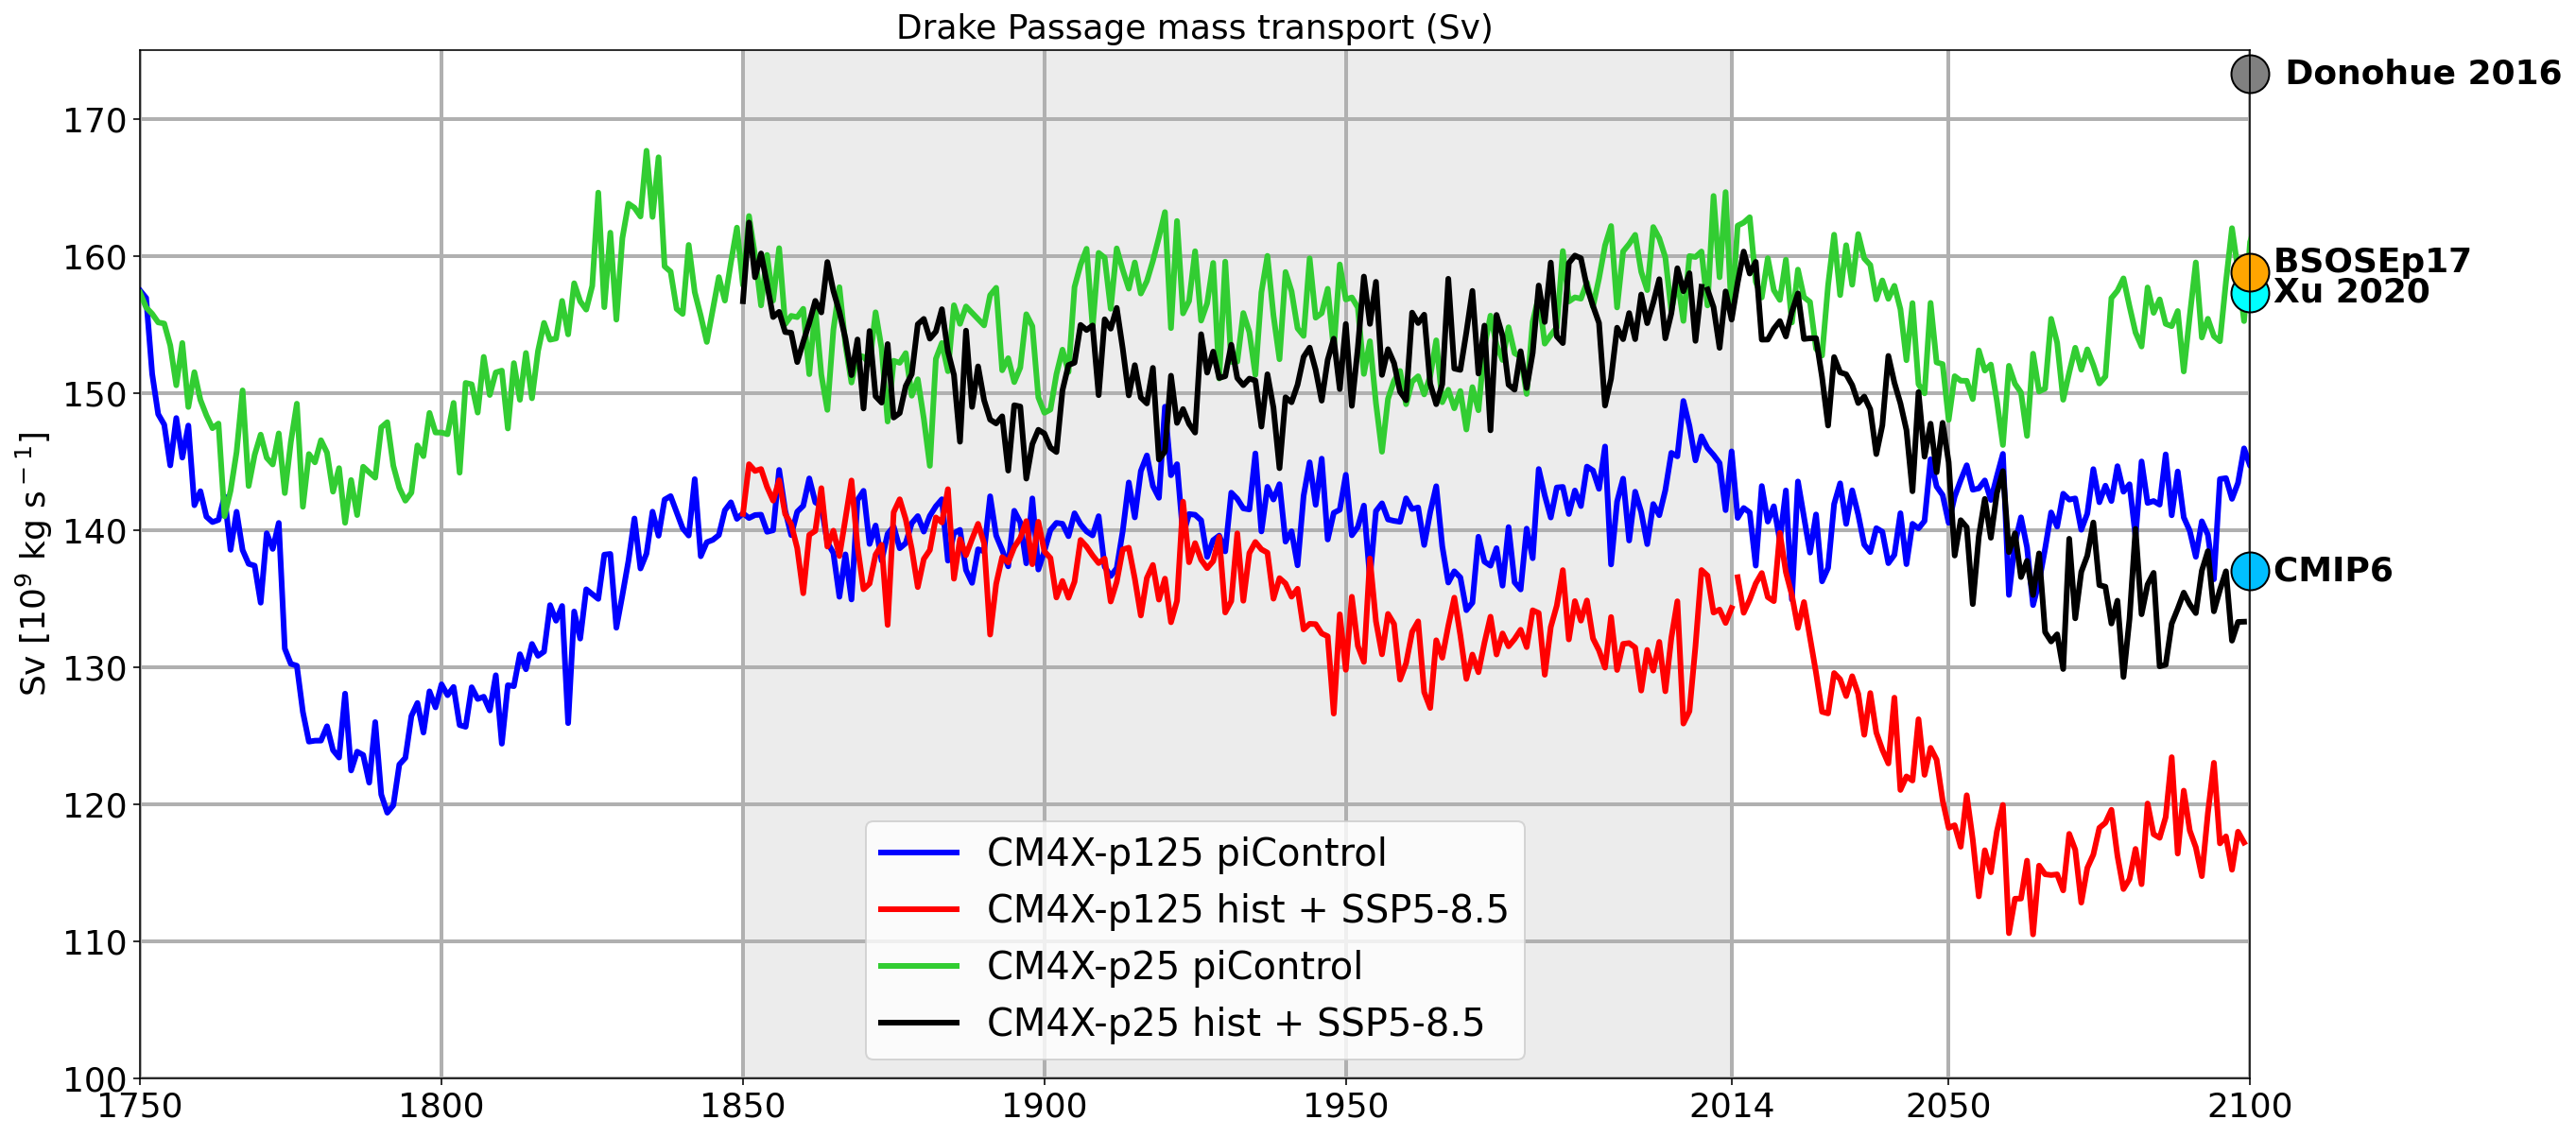

In [92]:
### Set up plots
fig, ax = plt.subplots(figsize=(20,10),facecolor='white')

plt.plot(ACC_p125_cntrl_time.time,ACC_p125_cntrl,color='blue',linewidth=3, label = 'CM4X-p125 piControl')
plt.plot(ACC_p125_hist2_time.time,ACC_p125_hist_2,color='red',linewidth=3, label = 'CM4X-p125 hist + SSP5-8.5')
plt.plot(ACC_p125_SSP585_time.time,ACC_p125_SSP585,color='red',linewidth=3,)

plt.plot(ACC_p25_cntrl_time.time,ACC_p25_cntrl.sel(time=slice('0001-07-02','0900-07-02')),color='limegreen',linewidth=3, label = 'CM4X-p25 piControl')
plt.plot(ACC_p25_hist_time.time,ACC_p25_hist,color='k',linewidth=3, label = 'CM4X-p25 hist + SSP5-8.5')
plt.plot(ACC_p25_SSP585_time.time,ACC_p25_SSP585,color='k',linewidth=3)

plt.xlim(1750,2100)
plt.grid(linewidth=1.5, linestyle='-')

ax.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=18)
ax.set_title('Drake Passage mass transport (Sv)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

## add horizontal spanned shading
y1_hist = 1850
y2_hist = 2014
plt.axvspan(y1_hist, y2_hist, color='grey', alpha=0.15, lw=1)

## add horizontal spanned shading
#y1_ssp = 2014
#y2_ssp = 2100
#plt.axvspan(y1_ssp, y2_ssp, color='cornflowerblue', alpha=0.15, lw=1)

## add vertical spanned shading that indicates observations
y1_Donohue = (151.9)
y2_Donohue = (194.4)
acc_Donohue = (173.3)

y3_Xu2020 = (157.3)
y2_Xu2020 = (161.9)
acc_Xu2020 = (152.7)

acc_BSOSE_1_6 = (158.79)


## Donohue et al. 2016
#plt.axhspan(y1_Donohue, y2_Donohue, color='grey', alpha=0.15, lw=0)
#ax.axhline(y3_Donohue, color='black', label = 'Donohue et al., 2016', linestyle='--')

## Xu et al., 2020
#plt.axhspan(y1_Xu2020, y2_Xu2020, color='orange', alpha=0.15, lw=0)
#ax.axhline(y3_Xu2020, color='orange', label = 'Xu et al., 2020', linestyle='--')

#ax.axhline(y_BSOSE_1_6, color='purple', linestyle='--')
#ax.axhline(y_BSOSE_1_3, color='cyan', label = 'BSOSE-p33', linestyle='--')

plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])
# old: plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650])

plt.legend(fontsize=14)

x_end = 2100
#x_end = 2650


### Add markers

ax.plot(2100,acc_Donohue,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='grey',clip_on=False)
ax.annotate('   Donohue 2016',
             (2100,acc_Donohue),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center', clip_on=False)

ax.plot(2100,y3_Xu2020,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='cyan',clip_on=False)
ax.annotate('  Xu 2020',
             (2100,y3_Xu2020),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center',clip_on=False)

ax.plot(2100,acc_BSOSE_1_6,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='orange', clip_on=False,)
ax.annotate('  BSOSEp17',
             (2100,acc_BSOSE_1_6),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False)

ax.plot(2100,137,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='deepskyblue',clip_on=False)
ax.annotate('  CMIP6',
             (2100,137),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False, va='center')

ax.legend(loc='lower center',fontsize=20)
ax.set_ylim([100,175])
ax.set_xlim(1750,2100)
ax.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=18)
ax.grid(linewidth=2)
plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])

fig.savefig('ACC_Drake_piControl_CM4X_Odiv313_update.png', bbox_inches='tight', dpi=400)

In [ ]:
ACC_p25_SSP585

ValueError: x and y must have same first dimension, but have shapes (900,) and (1035,)

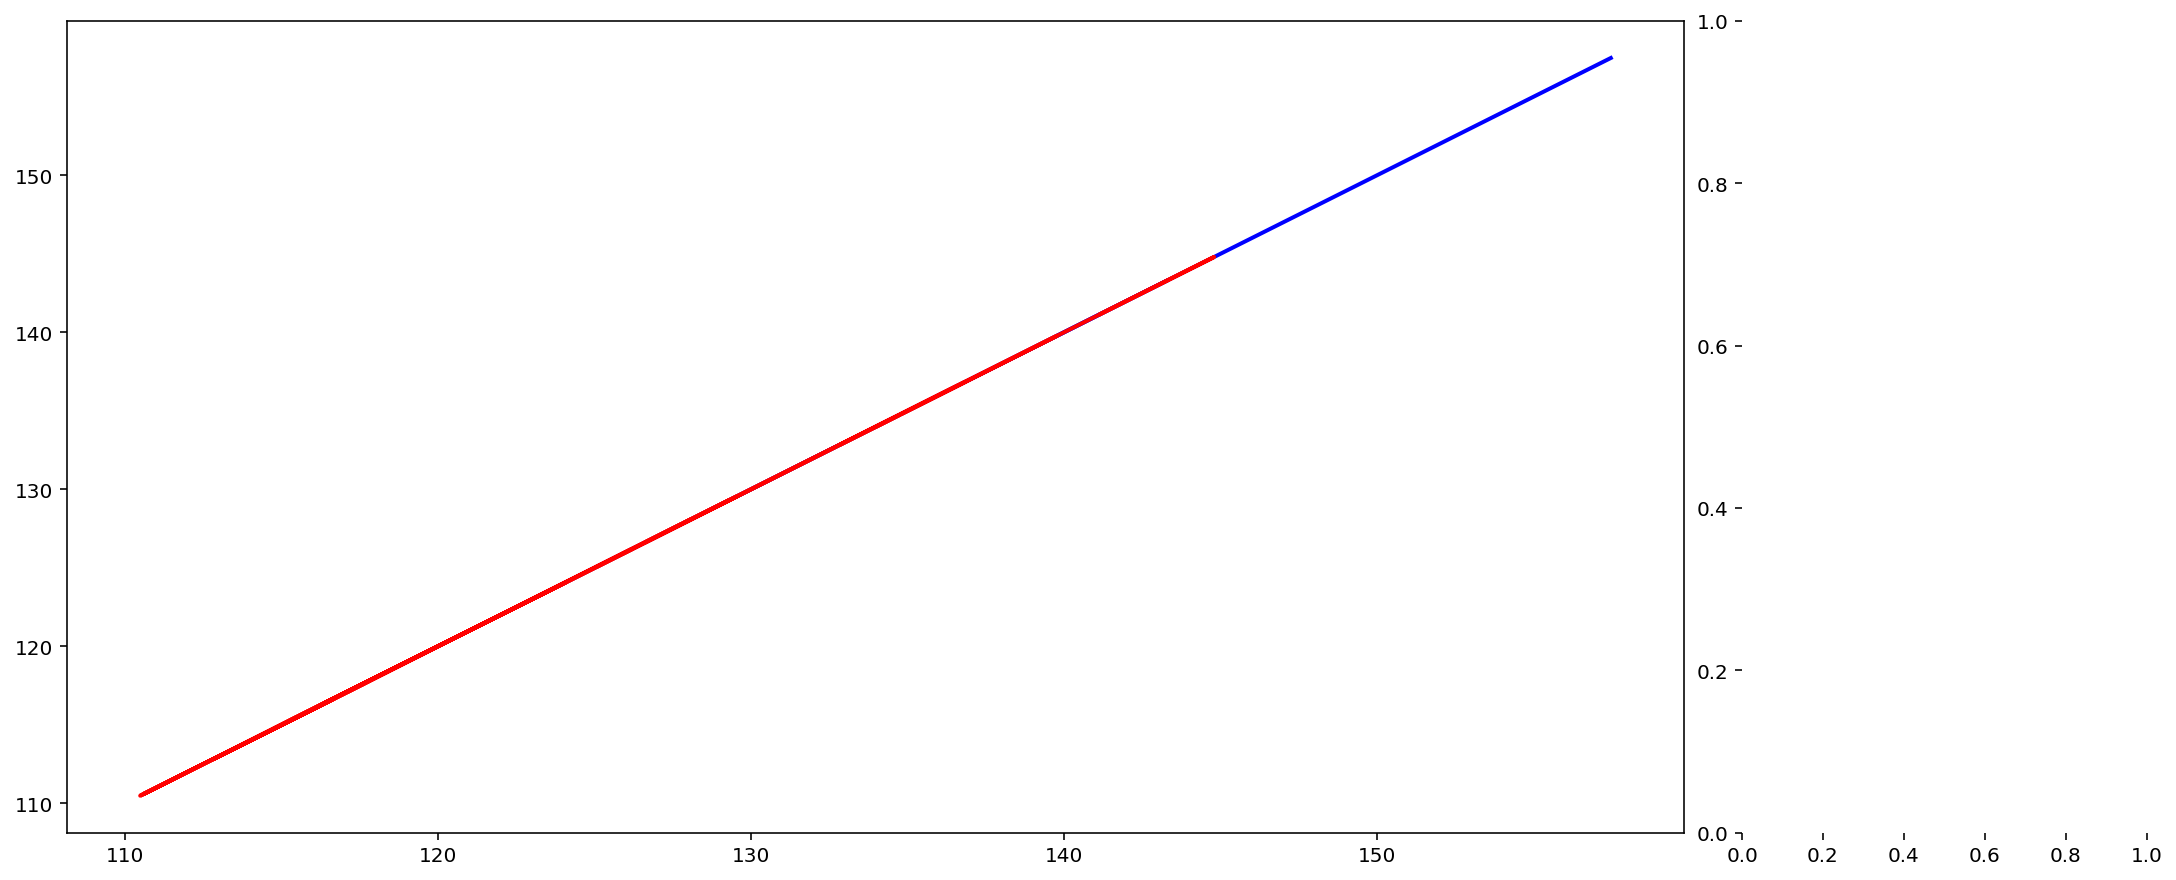

In [24]:
from matplotlib import gridspec
from matplotlib import colorbar

### Set up plots
fig = plt.figure(figsize=(15,6), constrained_layout=True)

widths = [4,1]

gs = fig.add_gridspec(1, 2, width_ratios=widths,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=-0.1, hspace=0.1)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1],frameon=False)


### Drake Passage timeseries

ax_1.plot(ACC_p125_cntrl_time,ACC_p125_cntrl,color='blue',linewidth=2, label = 'CM4X-p125 piControl')
ax_1.plot(ACC_p125_hist2_time,ACC_p125_hist_2,color='red',linewidth=2, label = 'CM4X-p125 hist + SSP5-8.5')
ax_1.plot(ACC_p125_SSP585_time,ACC_p125_SSP585,color='red',linewidth=2)
ax_1.plot(ACC_p25_cntrl_time,ACC_p25_cntrl,color='green',linewidth=2, label = 'CM4X-p25 piControl')
ax_1.plot(ACC_p25_hist_time,ACC_p25_hist,color='k',linewidth=2, label = 'CM4X-p25 hist + SSP5-8.5')
ax_1.plot(ACC_p25_SSP585_time,ACC_p25_SSP585,color='k',linewidth=2)

ax_1.set_xlim(1750,2100)
ax_1.set_ylim(99,175)
ax_1.grid(linewidth=1.5, linestyle='-')

ax_1.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=18)
ax_1.set_title('Drake Passage mass transport (Sv)', fontsize=18)
ax_1.set_xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100],fontsize=18)
ax_1.xaxis.set_tick_params(labelsize=18)
ax_1.yaxis.set_tick_params(labelsize=18)

## add horizontal spanned shading
y1_hist = 1850
y2_hist = 2014
ax_1.axvspan(y1_hist, y2_hist, color='grey', alpha=0.15, lw=0)


### Add obs to second panel

ax_2.yaxis.set_label_position("right")
ax_2.yaxis.tick_right()
ax_2.set_ylim(99,175)
ax_2.set_xlim=(-10,1)
ax_2.axes.get_xaxis().set_visible(False)
ax_2.axes.get_yaxis().set_ticks([])

## 
#y1_Donohue = (151.9)
#y2_Donohue = (194.4)
acc_Donohue = (173.3)

acc_Xu2020 = (157.3)
#y2_Xu2020 = (161.9)
#y1_Xu2020 = (152.7)

acc_BSOSE_1_6 = (158.79)

### Add markers

ax_1.plot(2100,acc_Donohue,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='grey',clip_on=False)
ax_1.annotate('   Donohue 2016',
             (2100,acc_Donohue),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center', clip_on=False)

ax_1.plot(2100,acc_Xu2020,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='cyan',clip_on=False)
ax_1.annotate('  Xu 2020',
             (2100,acc_Xu2020),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center',clip_on=False)

ax_1.plot(2100,acc_BSOSE_1_6,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='orange', clip_on=False,)
ax_1.annotate('  BSOSEp17',
             (2100,acc_BSOSE_1_6),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False)

ax_1.plot(2100,137,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='deepskyblue',clip_on=False)
ax_1.annotate('  CMIP6',
             (2100,137),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False, va='center')

ax_1.legend(loc='lower center',fontsize=16)

### Add legend to the side
### CMIP6 is 137 +/- 37
### CMip5 is 148 +/- 38

## add horizontal spanned shading
#x1_cmip6 = 1818
#x2_cmip6 = 1822
#y1_cmip6 = 130
#y2_cmip6 = 174
#ax_1.fill_between((x1_cmip6,x2_cmip6),137,y2_cmip6, color='deepskyblue',alpha=0.15,lw=0)
#ax_1.fill_between((x1_cmip6,x2_cmip6),100,137, color='deepskyblue',alpha=0.15,lw=0)

# fig.savefig('Drake_CM4X.png', bbox_inches='tight', dpi=200)

In [ ]:
fig, ax_1 = plt.subplots(figsize=(6.5,4))

### Drake Passage timeseries

ax_1.plot(ACC_p125_cntrl_time,ACC_p125_cntrl,color='blue',linewidth=1, label = 'CM4X-p125 piControl')
ax_1.plot(ACC_p125_hist2_time,ACC_p125_hist_2,color='red',linewidth=1, label = 'CM4X-p125 hist + SSP5-8.5')
ax_1.plot(ACC_p125_SSP585_time,ACC_p125_SSP585,color='red',linewidth=1)
ax_1.plot(ACC_p25_cntrl_time,ACC_p25_cntrl,color='green',linewidth=1, label = 'CM4X-p25 piControl')
ax_1.plot(ACC_p25_hist_time,ACC_p25_hist,color='k',linewidth=1, label = 'CM4X-p25 hist + SSP5-8.5')
ax_1.plot(ACC_p25_SSP585_time,ACC_p25_SSP585,color='k',linewidth=1)

ax_1.set_xlim(1750,2100)
ax_1.set_ylim(110,175)
ax_1.grid(linewidth=1, linestyle='-')

ax_1.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=12)
ax_1.set_title('Drake Passage mass transport (Sv)', fontsize=15)
ax_1.set_xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100],fontsize=12)
ax_1.xaxis.set_tick_params(labelsize=12)
ax_1.yaxis.set_tick_params(labelsize=12)

## add horizontal spanned shading
y1_hist = 1850
y2_hist = 2014
ax_1.axvspan(y1_hist, y2_hist, color='grey', alpha=0.15, lw=0)


## 
#y1_Donohue = (151.9)
#y2_Donohue = (194.4)
acc_Donohue = (173.3)

acc_Xu2020 = (157.3)
#y2_Xu2020 = (161.9)
#y1_Xu2020 = (152.7)

acc_BSOSE_1_6 = (158.79)

### Add markers

ax_1.plot(2100,acc_Donohue,marker='o',markersize=10,markeredgecolor='k',markerfacecolor='grey',clip_on=False)
ax_1.annotate('   Donohue 2016',
             (2100,acc_Donohue),
             fontsize=10,
             color='k',
             horizontalalignment='left',
             va='center', clip_on=False)

ax_1.plot(2100,acc_Xu2020,marker='o',markersize=10,markeredgecolor='k',markerfacecolor='cyan',clip_on=False)
ax_1.annotate('  Xu 2020',
             (2100,acc_Xu2020),
             fontsize=10,
             color='k',
             horizontalalignment='left',
             va='center',clip_on=False)

ax_1.plot(2100,acc_BSOSE_1_6,marker='o',markersize=10,markeredgecolor='k',markerfacecolor='orange', clip_on=False,)
ax_1.annotate('  BSOSEp17',
             (2100,acc_BSOSE_1_6),
             fontsize=10,
             color='k',
             horizontalalignment='left',
             clip_on=False)

ax_1.plot(2100,137,marker='o',markersize=10,markeredgecolor='k',markerfacecolor='deepskyblue',clip_on=False)
ax_1.annotate('  CMIP6',
             (2100,137),
             fontsize=10,
             color='k',
             horizontalalignment='left',
             clip_on=False, va='center')

ax_1.legend(loc='lower center',fontsize=8)

fig.savefig('Drake_CM4X_Beadling_draft5.png', bbox_inches='tight', dpi=400)

In [83]:
test = xr.open_dataset('/home/rlb/acc_cmip6/notebooks/decompose_drake_passage/DrakePassage_2D_Computed_Fields_Control_new.nc')

In [84]:
cmip_cm4_acc = ((test.umo_Sv.sum(dim=['z_l','yh'])/1035)/10**6)

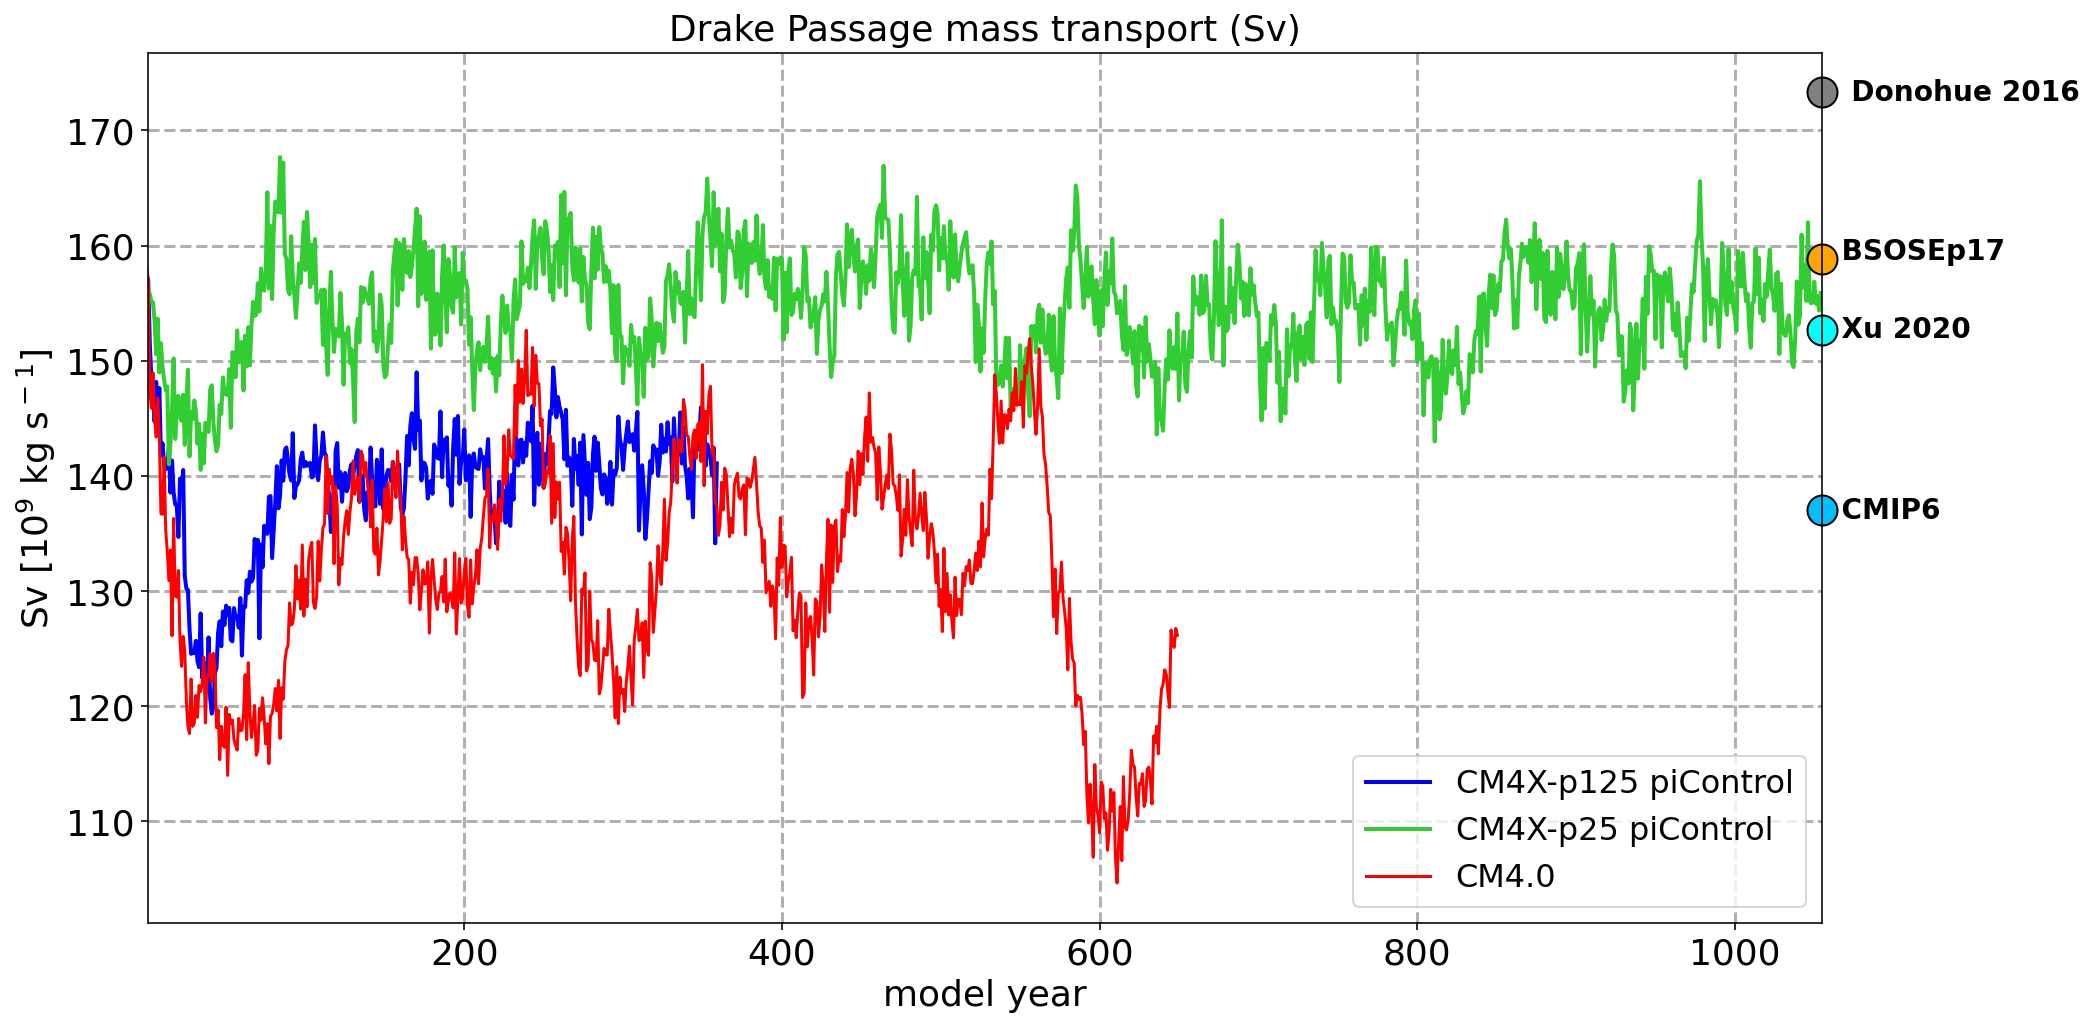

In [89]:
fig, ax = plt.subplots(figsize=(15,8),facecolor='white')

plt.plot(ACC_p125_cntrl,color='blue',linewidth=2, label = 'CM4X-p125 piControl')
plt.plot(ACC_p25_cntrl,color='limegreen',linewidth=2, label = 'CM4X-p25 piControl')
plt.plot(ml.util.annual_average(cmip_cm4_acc),color='red', label = 'CM4.0')

x_end = 1055




### Add markers

ax.plot(1055,acc_Donohue,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='grey',clip_on=False)
ax.annotate('   Donohue 2016',
             (1055,acc_Donohue),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center', clip_on=False)

ax.plot(1055,acc_Xu2020,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='cyan',clip_on=False)
ax.annotate('  Xu 2020',
             (1055,acc_Xu2020),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center',clip_on=False)

ax.plot(1055,acc_BSOSE_1_6,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='orange', clip_on=False,)
ax.annotate('  BSOSEp17',
             (1055,acc_BSOSE_1_6),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False)

ax.plot(1055,137,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='deepskyblue',clip_on=False)
ax.annotate('  CMIP6',
             (1055,137),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False, va='center')

ax.legend(loc='lower right',fontsize=16)

plt.xlim(1,1055)
plt.grid(linewidth=1.5, linestyle='--')

ax.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=18)
ax.set_xlabel('model year',fontsize=18)
ax.set_title('Drake Passage mass transport (Sv)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.savefig('ACC_Drake_piControl_CM4X_CM4p0_Updated.png', bbox_inches='tight', dpi=400)

In [ ]:
ACC_p125_cntrl